In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\aarti\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Step 1: Load the dataset
df = pd.read_csv('crop_fertilizers.csv')

In [3]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
200,29,58,34,Sandy,Millets,15,0,37,DAP
201,27,54,30,Clayey,Pulses,13,0,13,20-20
202,30,60,58,Loamy,Sugarcane,10,7,32,14-35-14
203,32,62,34,Red,Tobacco,22,0,24,28-28


In [4]:

# Step 2: Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

In [5]:
# Step 3: Check the first few rows of the dataset
print(df.head())


   Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26        52        38     Sandy      Maize        37          0   
1           29        52        45     Loamy  Sugarcane        12          0   
2           34        65        62     Black     Cotton         7          9   
3           32        62        34       Red    Tobacco        22          0   
4           28        54        46    Clayey      Paddy        35          0   

   Phosphorous Fertilizer Name  
0            0            Urea  
1           36             DAP  
2           30        14-35-14  
3           20           28-28  
4            0            Urea  


In [6]:
# Step 4: Handle missing values (None in your case as you already checked isnull())
print(df.isnull().sum())

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64


In [7]:
# Step 5: Define features (X) and target variable (y) - Crop Type
X = df[['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Nitrogen', 'Potassium', 'Phosphorous']].copy()
y = df['Crop Type'].copy()

In [8]:
X['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [9]:

# Step 6: Label Encoding for categorical variables (Soil Type and Crop Type)
encode_soil = LabelEncoder()
X['Soil Type'] = encode_soil.fit_transform(X['Soil Type'])

In [10]:
encode_crop = LabelEncoder()
y = encode_crop.fit_transform(y)

In [11]:

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
df.head(10)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
5,26,52,35,Sandy,Barley,12,10,13,17-17-17
6,25,50,64,Red,Cotton,9,0,10,20-20
7,33,64,50,Loamy,Wheat,41,0,0,Urea
8,30,60,42,Sandy,Millets,21,0,18,28-28
9,29,58,33,Black,Oil seeds,9,7,30,14-35-14


In [13]:
X_test

,Temparature,Humidity,Moisture,Soil Type,Nitrogen,Potassium,Phosphorous
15,31,62,49,0,10,13,14
9,29,58,33,0,9,7,30
100,26,52,48,2,23,0,19
132,34,65,48,2,23,0,19
68,25,50,40,1,6,19,16
95,30,60,27,3,4,17,17
159,26,52,35,4,12,10,13
162,30,60,42,4,21,0,18
147,29,58,52,2,13,0,36
182,25,50,56,2,11,13,15


In [14]:
# Step 8: Feature scaling using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_test

array([[ 0.17901441,  0.45755314,  0.49831781, -1.47451468, -0.76813121,
         1.78796817, -0.3422389 ],
       [-0.3801925 , -0.21094321, -0.91376203, -1.47451468, -0.85722139,
         0.69722999,  0.84094274],
       [-1.21900287, -1.21368773,  0.41006282, -0.03937873,  0.39004117,
        -0.57529788,  0.02750537],
       [ 1.01782477,  0.9589254 ,  0.41006282, -0.03937873,  0.39004117,
        -0.57529788,  0.02750537],
       [-1.49860633, -1.5479359 , -0.2959771 , -0.75694671, -1.12449194,
         2.87870634, -0.19434119],
       [-0.10058905,  0.12330497, -1.44329197,  0.67818925, -1.30267231,
         2.51512695, -0.12039234],
       [-1.21900287, -1.21368773, -0.73725205,  1.39575722, -0.58995084,
         1.24259908, -0.41618775],
       [-0.10058905,  0.12330497, -0.11946712,  1.39575722,  0.2118608 ,
        -0.57529788, -0.04644349],
       [-0.3801925 , -0.21094321,  0.76308278, -0.03937873, -0.50086066,
        -0.57529788,  1.28463586],
       [-1.49860633, -1.5479

In [16]:
# Step 9: Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Step 10: Make predictions on the test set
y_pred = classifier.predict(X_test)


In [18]:

# Step 11: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9024390243902439


In [19]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[3 0 0 1 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 1 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0]
 [0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 6]]


In [20]:

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         5
           2       0.50      1.00      0.67         2
           3       0.67      1.00      0.80         2
           4       1.00      0.80      0.89         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       0.80      1.00      0.89         4
           8       1.00      1.00      1.00         6
           9       0.00      0.00      0.00         2
          10       1.00      1.00      1.00         6

    accuracy                           0.90        41
   macro avg       0.82      0.87      0.83        41
weighted avg       0.89      0.90      0.89        41



C:\Users\aarti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aarti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aarti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


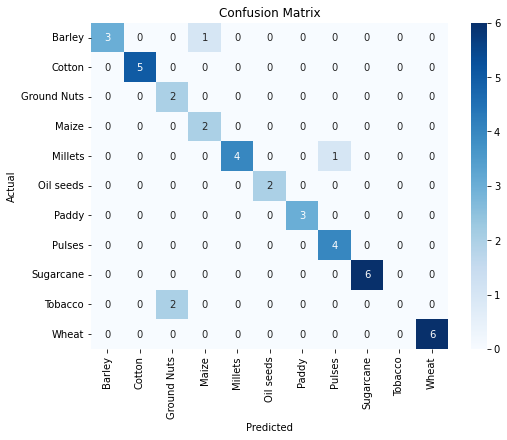

In [21]:

# Step 12: Visualize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encode_crop.classes_, yticklabels=encode_crop.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [22]:
# Assuming the Random Forest Classifier is already trained and stored in the variable 'classifier'

# Step 1: Prepare the new input data (e.g., [Temperature, Humidity, Moisture, Soil Type, Nitrogen, Potassium, Phosphorous])
# Note: Make sure the input is in the same format as the training data
new_data = np.array([[29, 58, 33, 'Black', 9, 7, 30]])

# Step 2: Convert the 'Soil Type' feature using the same LabelEncoder used for training
new_data_df = pd.DataFrame(new_data, columns=['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Nitrogen', 'Potassium', 'Phosphorous'])

# Label encoding for 'Soil Type' (same as training)
new_data_df['Soil Type'] = encode_soil.transform(new_data_df['Soil Type'])

# Step 3: Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data_df[['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Nitrogen', 'Potassium', 'Phosphorous']])

# Step 4: Make the prediction
y_pred_new = classifier.predict(new_data_scaled)

# Convert the predicted label back to the original crop type using the reverse label encoding
predicted_crop = encode_crop.inverse_transform(y_pred_new)

# Print the predicted crop type
print("Predicted Crop Type:", predicted_crop[0])


Predicted Crop Type: Oil seeds


In [23]:
import joblib
joblib.dump(classifier, "model.joblib")
import joblib
classifier = joblib.load("model.joblib")


In [24]:
import pickle

# Step 1: Save the trained Random Forest model to a pickle file
with open('crop_model.pkl', 'wb') as f:
    pickle.dump(classifier, f)
    
# Step 2: Load the trained model from the pickle file
with open('crop_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)



In [25]:


with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('soil_encoder.pkl', 'wb') as f:
    pickle.dump(encode_soil, f)

with open('crop_encoder.pkl', 'wb') as f:
    pickle.dump(encode_crop, f)
